## Havvind - Integrated potential density anomaly at Sørvest-F and Nordvest-C

Potential density/energy anomaly (PEA) is a measure of mixing in the upper ocean layer. More mixing leads to a higher potential energy by lifting mass in the gravitational field. In the context of OWFs we want to assess whether the turbines and their associated wind wake will impact the mixing, and one way to investigate this is through PEA.

PEA can be defined as $$\varphi = \int_{D - \eta}^{\eta} -gz  \frac{(\rho _{ref} - \rho)}{\rho _{ref}} dz$$ $$[m^3 s^-2]$$

We are interested in the change between reference situation and simulation with turbines, that is: 
$$\varphi_{EXP} - \varphi_{REF} = \int_{D - \eta_{EXP}}^{\eta_{EXP}} -gz  \frac{(\rho_{ref} - \rho_{EXP})}{\rho _{ref}} dz - \int_{D - \eta_{REF}}^{\eta_{REF}} -gz  \frac{(\rho_{ref} - \rho_{REF})}{\rho _{ref}} dz $$


In [1]:
%load_ext autoreload
%autoreload 2

from Rossby_deformation.get_turbine_coords import get_turbine_coords
from Rossby_deformation.funcs import *
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import cartopy.feature as cfeature

mplstyle.use(['ggplot', 'fast'])

Under: maxdepth is -20.

In [57]:
testpath = '/lustre/storeB/project/nwp/havvind/hav/analysis_kjsta/output_pea/tests/REF_02_norkyst_avg_0001_pea_testing19085.nc'
test = xr.open_dataset(testpath)

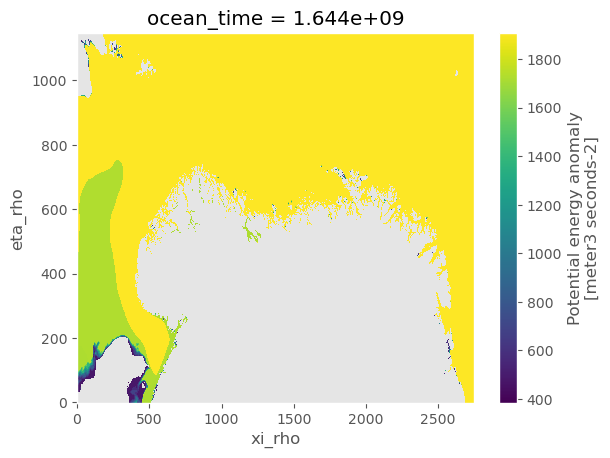

In [58]:
test.pea.isel(ocean_time=0).plot()

Under: maxdepth er bathymetry

In [46]:
testpath = '/lustre/storeB/project/nwp/havvind/hav/analysis_kjsta/output_pea/tests/REF_02_norkyst_avg_0001_pea_testing19082.nc'
test = xr.open_dataset(testpath)

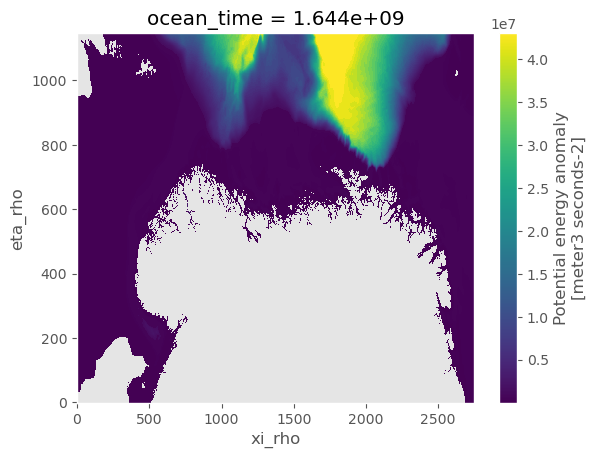

In [47]:
test.pea.isel(ocean_time=0).plot()

In [49]:
test.pea.min()

<xarray.DataArray 'pea' ()>
array(384.23288154)
Attributes:
    long_name:  Potential energy anomaly
    units:      meter3 seconds-2

Under er maxdyp = 20

In [50]:
testpath = '/lustre/storeB/project/nwp/havvind/hav/analysis_kjsta/output_pea/tests/REF_02_norkyst_avg_0001_pea_testing19083.nc'
test = xr.open_dataset(testpath)

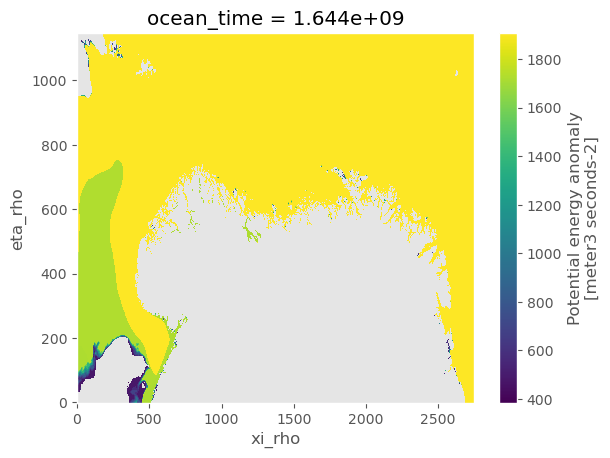

In [51]:
test.pea.isel(ocean_time=0).plot()

Under er maksdyp=MLD

In [53]:
testpath = '/lustre/storeB/project/nwp/havvind/hav/analysis_kjsta/output_pea/tests/REF_02_norkyst_avg_0001_pea_testing19084.nc'
test = xr.open_dataset(testpath)

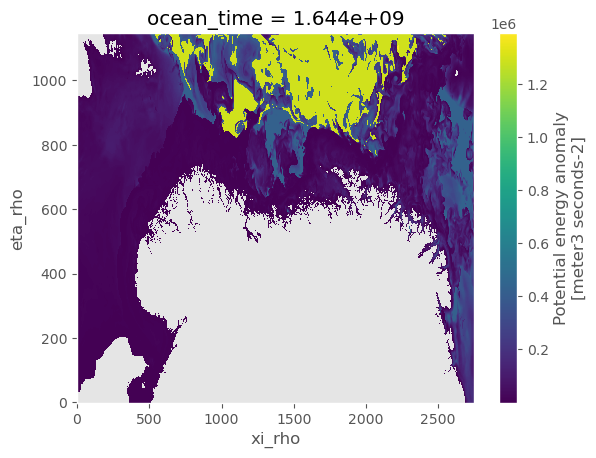

In [54]:
test.pea.isel(ocean_time=0).plot()

In [56]:
test.pea.min()

<xarray.DataArray 'pea' ()>
array(4.65795366)
Attributes:
    long_name:  Potential energy anomaly
    units:      meter3 seconds-2

In [2]:
# Making a grid
path = '/lustre/storeB/project/nwp/havvind/hav/results/experiment/EXP-03/norkyst_avg_0001.nc'
fid = Dataset(path)
grid = SGrid(fid)
del fid

In [7]:
# Extracting paths to files containing the computed Rossby deformation radius
# Note: I'm using the reference datasets and not the experiments
# Rossby deformation radius computed from the experiment datasets are found in output_bdr/EXP

filefolder = glob('/lustre/storeB/project/nwp/havvind/hav/analysis_kjsta/output_bdr/REF')

# Only using June because we want the largest Rossby radius
months = {
"06": 30   # June
}

files=[]  # empty list to store paths in

# building paths to contain each daily file and named thereafter
for month, days in months.items():
    for day in range(1, days + 1): 
        day_str = f"{day:04}"
        file_path = f'/REF_{month}_norkyst_avg_{day_str}_brr.nc'
        files.append(filefolder[0]+file_path)

In [11]:
sorvest_F = get_turbine_coords('/lustre/storeB/project/nwp/havvind/turbine_coordinates/windfarms_Sorvest_F.txt')

In [12]:
# Square around wind park
min_lon_SV = np.min(sorvest_F.coordinates[:,0].values)
min_lat_SV = np.min(sorvest_F.coordinates[:,1].values)
max_lon_SV = np.max(sorvest_F.coordinates[:,0].values)
max_lat_SV = np.max(sorvest_F.coordinates[:,1].values)

area_lon_SV = [min_lon_SV, max_lon_SV]
area_lat_SV = [min_lat_SV, max_lat_SV]

In [13]:
# Internal Rossby radius of June - from area of wind parks
R1_june_SV = monthly_mean_area(files, grid, area_lon_SV, area_lat_SV)
R1_june_SV = R1_june_SV.gamma_r

In [14]:
files = '/lustre/storeB/project/nwp/havvind/hav/results/reference/REF-02/norkyst_avg_0001.nc'

In [16]:
full = xr.open_dataset(files)

In [45]:
full.h

<xarray.DataArray 'h' (eta_rho: 1148, xi_rho: 2747)>
[3153556 values with dtype=float64]
Coordinates:
    lon_rho  (eta_rho, xi_rho) float64 ...
    lat_rho  (eta_rho, xi_rho) float64 ...
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  bathymetry at RHO-points
    units:      meter
    grid:       grid
    location:   face
    field:      bath, scalar

In [17]:
pd = xr.open_dataset('/lustre/storeB/project/nwp/havvind/hav/analysis_kjsta/output_mld/REF/REF_06_norkyst_avg_0001_mld.nc')

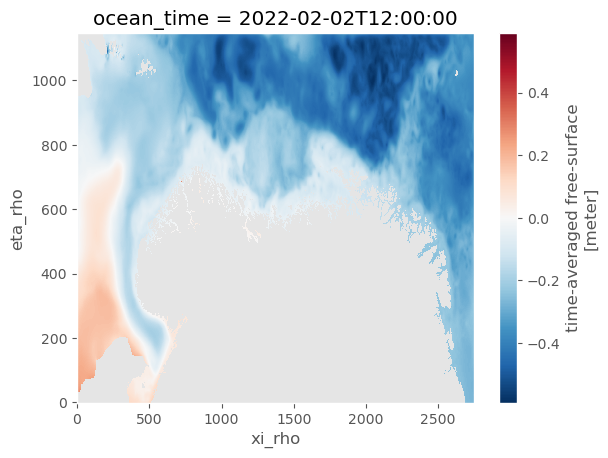

In [44]:
zeta.isel(ocean_time=0).plot()

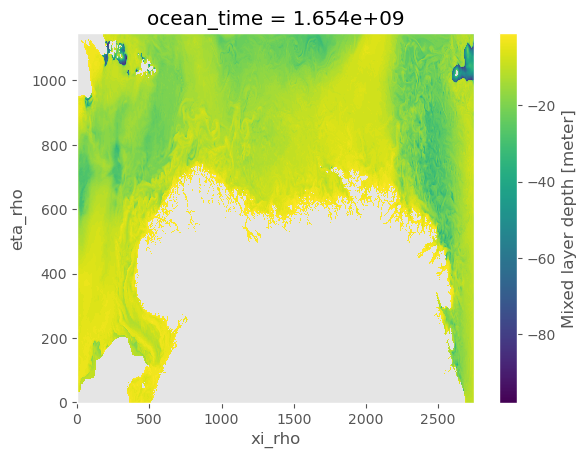

In [42]:
pd.mld.isel(ocean_time=0).plot()

In [19]:
rho = pd.pd

In [43]:
zeta

<xarray.DataArray 'zeta' (ocean_time: 1, eta_rho: 1148, xi_rho: 2747)>
[3153556 values with dtype=float32]
Coordinates:
    lon_rho     (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
  * ocean_time  (ocean_time) datetime64[ns] 2022-02-02T12:00:00
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  time-averaged free-surface
    units:      meter
    time:       ocean_time
    grid:       grid
    location:   face
    field:      free-surface, scalar, series

In [22]:
zeta = full.zeta

In [34]:
# Depths to interpolate to
zlevs = np.arange(0,51,1)
zlevs = np.insert(zlevs,len(zlevs),values=np.arange(52,102,2), axis =0)
zlevs = np.insert(zlevs,len(zlevs),values=np.arange(105,305,5), axis =0)
zlevs = np.insert(zlevs,len(zlevs),values=np.arange(520,1020,20), axis =0)
zlevs = np.insert(zlevs,len(zlevs),values=np.arange(1050,3050,50), axis =0)

zlevs = zlevs[np.where(zlevs<=np.max(grid.h))]
zlevs = np.array(zlevs)*-1.